In [51]:
import json
import requests
from matplotlib import pyplot as plt
from scipy.stats import linregress
from pprint import pprint
import pandas as pd

In [33]:
Income_df=pd.read_csv('Median Income.csv')



In [92]:
url = "https://api.usa.gov/crime/fbi/sapi/api/nibrs/homicide/offense/states/"
api_key="JWNFNOUahji0RfLcPp5tibijU737BDnY4kKfYU9i"
states=['CT', 'AL', 'MT', "MA", "DE", "MI", "MS", "ID", "AZ", "LA", "IL", "NE", "OH"]
homicide_count_2019=[]
# Build query URL
for state in states: 
    query_url = url + state + "/count?API_KEY=" + api_key
    response=requests.get(query_url).json()
    Murder_2019=response["data"][21]["value"]
    
    homicide_count_2019.append(Murder_2019)
print(homicide_count_2019)

[74, 2, 19, 78, 21, 552, 54, 26, 14, 43, 1, 12, 452]


In [93]:
states_df = pd.DataFrame({
    "State (Abbreviation)": states,
    "2019 Homicides (per FBI)": homicide_count_2019
})

states_df["State"]=["Connecticut", "Alabama", "Montana", "Massachusetts","Delaware", "Michigan","Mississippi", "Idaho", "Arizona", "Louisiana", "Illinois", "Nebraska", "Ohio" ]

states_df[["State", "State (Abbreviation)", "2019 Homicides (per FBI)"]]

,State,State (Abbreviation),2019 Homicides (per FBI)
0,Connecticut,CT,74
1,Alabama,AL,2
2,Montana,MT,19
3,Massachusetts,MA,78
4,Delaware,DE,21
5,Michigan,MI,552
6,Mississippi,MS,54
7,Idaho,ID,26
8,Arizona,AZ,14
9,Louisiana,LA,43


<AxesSubplot:xlabel='State (Abbreviation)'>

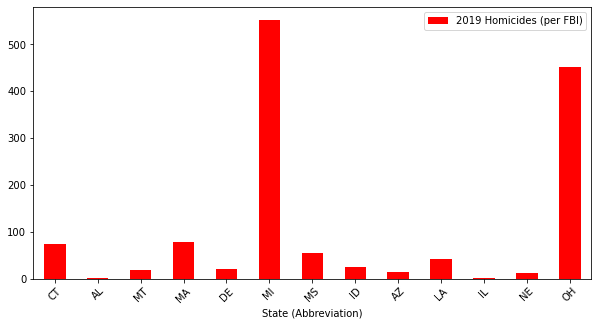

In [94]:
states_df.plot('State (Abbreviation)', '2019 Homicides (per FBI)', kind='bar', figsize=(10,5), rot=45, color="r")

In [95]:
merge_df = pd.merge(states_df, Income_df, on="State", how="left")

merge_df=merge_df[["State", "State (Abbreviation)", "2019 Homicides (per FBI)", "Median Income (2019)"]]

merge_df=merge_df.sort_values(by=['Median Income (2019)'], ascending=True)

merge_df

,State,State (Abbreviation),2019 Homicides (per FBI),Median Income (2019)
6,Mississippi,MS,54,"44,787"
9,Louisiana,LA,43,"51,707"
1,Alabama,AL,2,"56,200"
2,Montana,MT,19,"60,195"
5,Michigan,MI,552,"64,119"
12,Ohio,OH,452,"64,663"
7,Idaho,ID,26,"65,988"
8,Arizona,AZ,14,"70,674"
11,Nebraska,NE,12,"73,071"
4,Delaware,DE,21,"74,194"


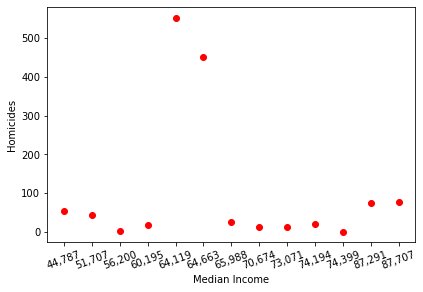

In [96]:
x_values = merge_df['Median Income (2019)']
y_values = merge_df['2019 Homicides (per FBI)']
plt.scatter(x_values,y_values, color="r")
plt.xlabel('Median Income')
plt.ylabel('Homicides')
plt.tight_layout()
plt.xticks(rotation=20)
plt.show()